In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
warnings.filterwarnings(action='ignore')

In [42]:
import pickle
with open("persistent_dataframe",'rb') as f:
    site_dataframes = pickle.load(f)  

In [43]:
# Remove Sites With No Solar Power Data
site_dataframes_without_solar = site_dataframes.copy()
for site_id, site_df in site_dataframes_without_solar.items():
    if len(site_df['SolarPower'].values) == 0:
        del site_dataframes[site_id]

## Solar Power by Site

From the following series of graphs we can see several sites that stand out as anomalies including: (6,24,25,26,33,34)
    
There are several other sites that could be considered anomalous but are not as obviously so. (1,2,5,7,9,12,18,31)

Note: some disturbances in the graph are due to gaps in data collection due to API disconnection

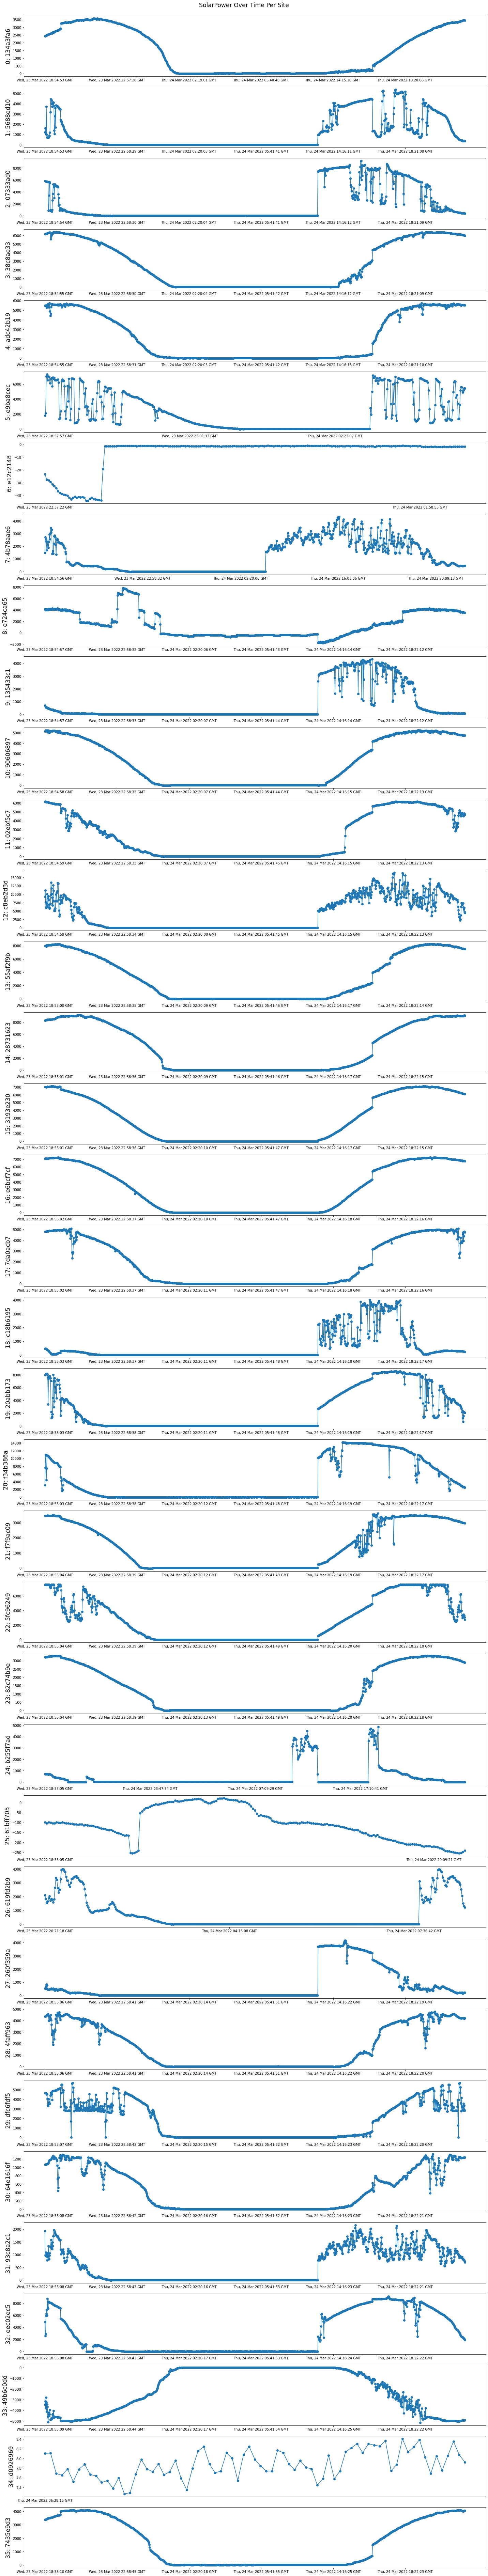

In [44]:
fig, axs = plt.subplots(len(site_dataframes),figsize=(20,3*num_to_show))
fig.suptitle("SolarPower Over Time Per Site", y=1, fontsize='xx-large')
for i, (site_id, site_df) in enumerate(site_dataframes.items()):
    x = site_df['Time'].values
    y = site_df['SolarPower'].values
    
    axs[i].set_ylabel(str(i)+': '+site_id,fontsize='xx-large')
    axs[i].plot(x, y, marker='o')
    axs[i].set_xticks(range(0,len(site_df),200), rotation=45) 

fig.tight_layout()
fig.subplots_adjust()

## Solar Power Across All Sites

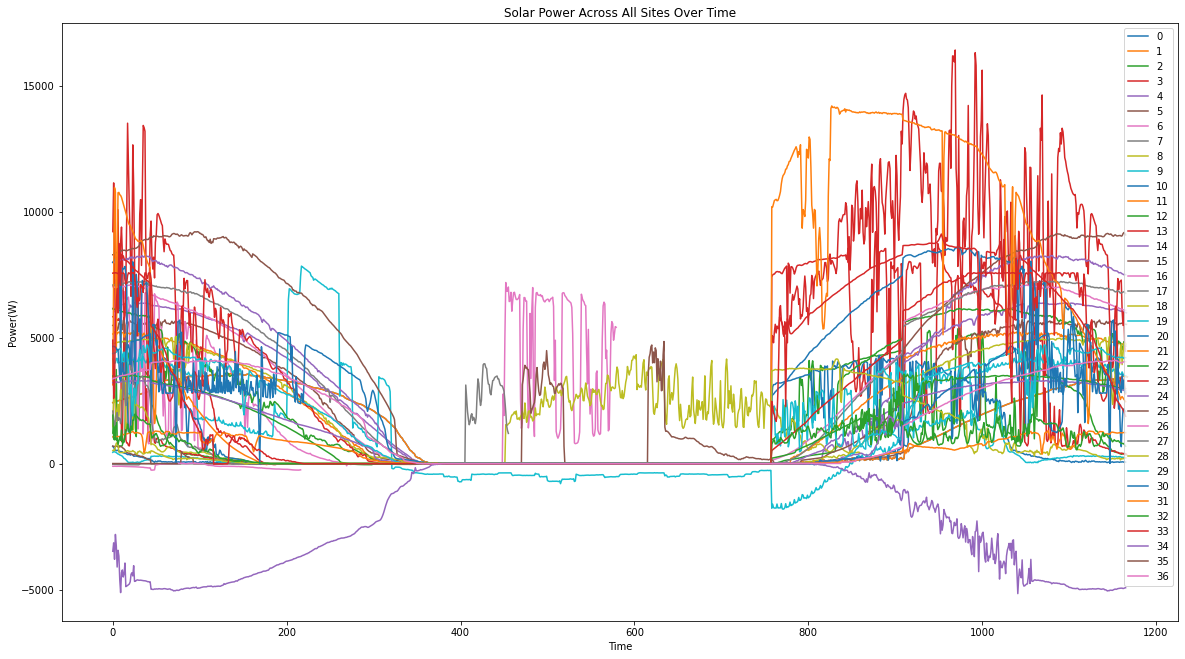

In [96]:
df1 = next(iter(site_dataframes.items()))[1]
ax = df1['SolarPower'].plot(figsize=(20, 11), label=str(0)) 
for i, (site_id, df) in enumerate(site_dataframes.items()):
    df['SolarPower'].plot(ax=ax, label=str(i+1))
    ax.legend()
    ax.set_title('Solar Power Across All Sites Over Time')
    ax.set_ylabel('Power(W)')
    ax.set_xlabel('Time')
xlim_prev = ax.get_xlim()
ylim_prev = ax.get_ylim()

#### NOTE: Refer to the legend above to select a specific graph to isolate in the plot below

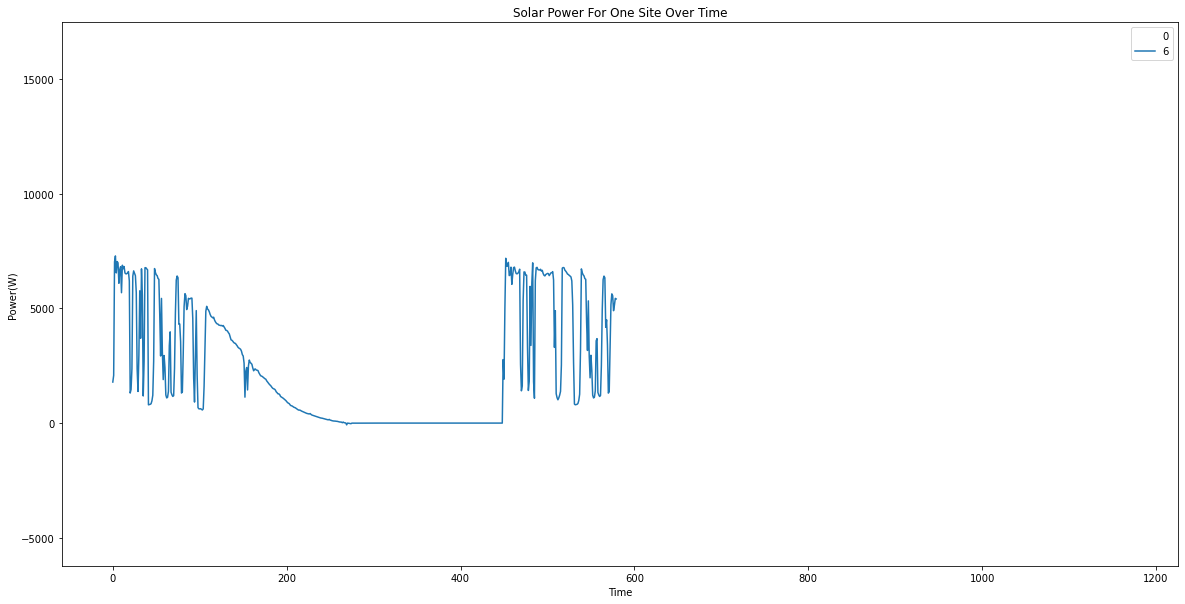

In [98]:
line_to_show = 6

df1 = next(iter(site_dataframes.items()))[1]
ax = df1['SolarPower'].plot(figsize=(20, 10), color='white', label=str(0)) 
for i, (site_id, df) in enumerate(site_dataframes.items()):
    if i+1 == line_to_show:
        df['SolarPower'].plot(ax=ax, label=str(i+1))
    ax.set_title('Solar Power For One Site Over Time')
    ax.set_ylabel('Power(W)')
    ax.set_xlabel('Time')
    
ax.set_xlim(xlim_prev)
ax.set_ylim(ylim_prev)
ax.legend()

### Site Power

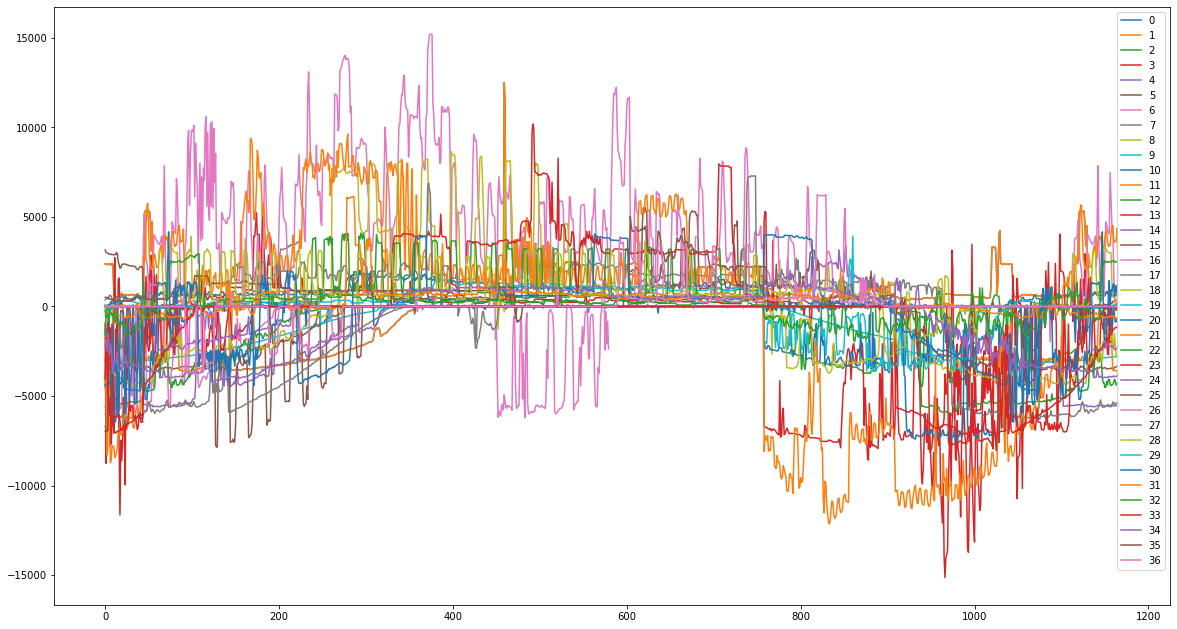

In [94]:
df1 = next(iter(site_dataframes.items()))[1]
ax = df1['SitePower'].plot(figsize=(20, 11), label=str(0)) 
for i, (site_id, df) in enumerate(site_dataframes.items()):
    df['SitePower'].plot(ax=ax, label=str(i+1))

### Battery Power

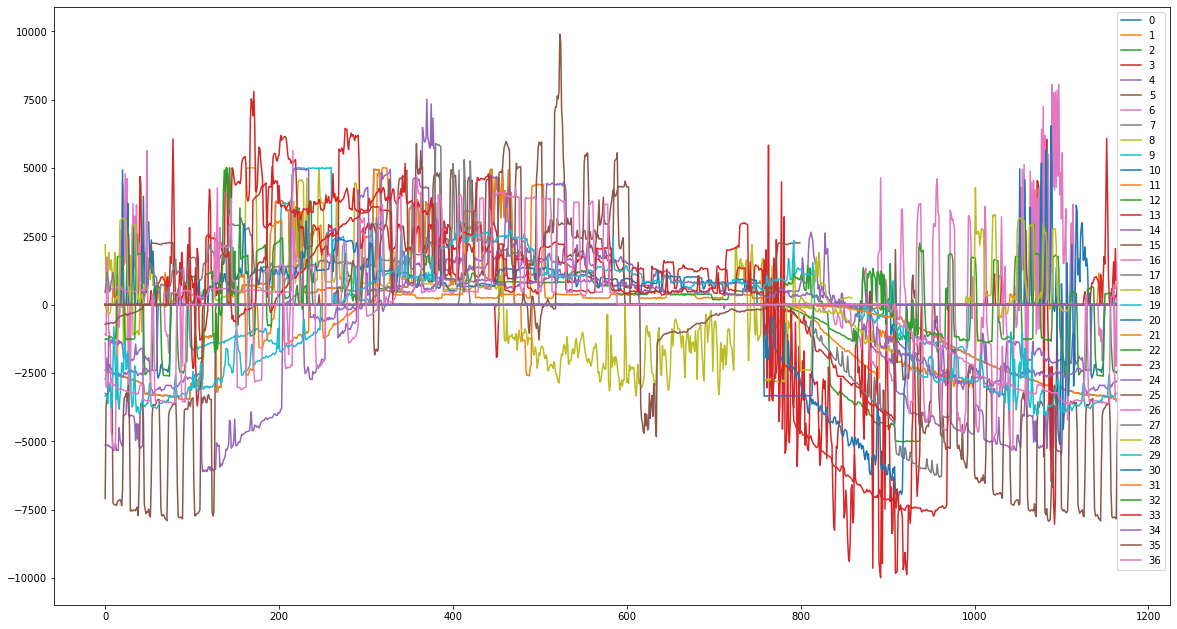

In [95]:
df1 = next(iter(site_dataframes.items()))[1]
ax = df1['BatteryPower'].plot(figsize=(20, 11), label=str(0)) 
for i, (site_id, df) in enumerate(site_dataframes.items()):
    df['BatteryPower'].plot(ax=ax, label=str(i+1))